In [1]:
import json
import os
from collections import defaultdict

performance_dir = "performance--q2-de_1"
noop_performance_dir = "performance--q2-noopt_1"
detection_dir = "detection--q2-de_1"

def filter_cars(detections):
    return [d for d in detections if d[-1] == 2.0]

performance_files = sorted(os.listdir(performance_dir))
noop_performance_files = sorted(os.listdir(noop_performance_dir))
detection_files = sorted(os.listdir(detection_dir))

skip_map = defaultdict(lambda: {'count': 0, 'overskip': 0, 'de_strongsort_time': 0, 'total_strongsort_time': 0})

for i in range(len(performance_files)):
    with open(os.path.join(performance_dir, performance_files[i])) as f:
        performance = json.load(f)
    with open(os.path.join(noop_performance_dir, noop_performance_files[i])) as f:
        noop_performance = json.load(f)
    with open(os.path.join(detection_dir, detection_files[i])) as f:
        all_detections = json.load(f)

    detection_estimation_benchmark = performance[5]["benchmark"]
    strong_sort_benchmark = noop_performance[5]["benchmark"]
    skip_track = detection_estimation_benchmark.get("skip_track", [])

    for track in skip_track:
        current_f, next_f, process_time = track
        skip_map[next_f-current_f-1]["count"] += 2
        skip_map[next_f-current_f-1]["de_strongsort_time"] = process_time + strong_sort_benchmark["frame_process_time"][current_f]
        current_detections = filter_cars(all_detections[current_f][0])
        overskip_counted = False
        for f in range(current_f, next_f):
            skip_map[next_f-current_f-1]["total_strongsort_time"] += strong_sort_benchmark["frame_process_time"][f]
            f_detections = filter_cars(all_detections[f][0])
            ### Temporary place holder for the accuracy comparison
            if len(f_detections) != len(current_detections) and not overskip_counted:
                skip_map[next_f-current_f-1]["overskip"] += 1
                overskip_counted = True

skip_map = dict(skip_map)
print(skip_map)

{0: {'count': 16546, 'overskip': 0, 'de_strongsort_time': 0.0003094673156738281, 'total_strongsort_time': 2.380432367324829}, 2: {'count': 252, 'overskip': 45, 'de_strongsort_time': 0.00753474235534668, 'total_strongsort_time': 0.058357954025268555}, 1: {'count': 418, 'overskip': 65, 'de_strongsort_time': 0.012253761291503906, 'total_strongsort_time': 0.07320380210876465}, 3: {'count': 98, 'overskip': 27, 'de_strongsort_time': 0.005663156509399414, 'total_strongsort_time': 0.023799419403076172}, 6: {'count': 40, 'overskip': 13, 'de_strongsort_time': 0.007382869720458984, 'total_strongsort_time': 0.018391847610473633}, 9: {'count': 26, 'overskip': 11, 'de_strongsort_time': 0.008169174194335938, 'total_strongsort_time': 0.023229122161865234}, 4: {'count': 128, 'overskip': 39, 'de_strongsort_time': 0.005258083343505859, 'total_strongsort_time': 0.04297471046447754}, 5: {'count': 68, 'overskip': 22, 'de_strongsort_time': 0.005715131759643555, 'total_strongsort_time': 0.03399205207824707}, 

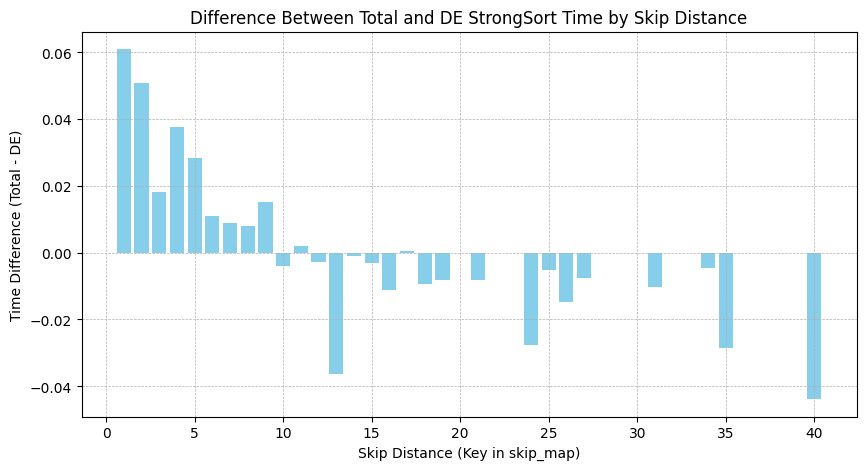

In [4]:
import matplotlib.pyplot as plt

# Assuming skip_map is the dictionary you have after running the above code
# Prepare the data for plotting
x_values = sorted(skip_map.keys())[1:]  # Sorting the keys to ensure the plot is ordered
y_values = [skip_map[k]['total_strongsort_time'] - skip_map[k]['de_strongsort_time'] for k in x_values]

# Plotting the data
plt.figure(figsize=(10, 5))  # You can adjust the figure size as needed
plt.bar(x_values, y_values, color='skyblue')  # Create a bar plot

# Add titles and labels
plt.title('Difference Between Total and DE StrongSort Time by Skip Distance')
plt.xlabel('Skip Distance (Key in skip_map)')
plt.ylabel('Time Difference (Total - DE)')

# Show grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()
